**Problem statement:**

Given a dataset containing the details of loan applicants, we need to build a machine learning model that can predict if LoanTap should provide a loan to a particular applicant or not. This will be based on other factors like the applicant's annual income, job title, employment duration, home ownership etc. For those applicants who are eligible for a loan, we need to identify the ideal repayment terms like duration and interest rate. Also, we need to identify the top factors contributing to the final decision (loan_status) through exploratory data analysis and correlation. This will be a binary classification problem (since loan_status can take only 2 values) and hence we need to use logistics regression to build the model and evaluate its performance through Precision and Recall.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve


df = pd.read_csv('LoanTap_logistic_regression.csv')
df.shape

(396030, 27)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [ ]:
categorical_cols = [
    'grade',
    'sub_grade',
    'emp_length',
    'home_ownership',
    'verification_status',
    'loan_status',
    'purpose',
    'initial_list_status',
    'application_type'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


**Observations:**
1.   The dataset has 3.96 lakhs records and 27 columns. 'loan_status' is the dependent variable and all the other 26 columns are independent variables
2.   Numerical columns like loan_amnt, int_rate, installment etc. are float datatypes whereas grade, subgrade etc are object datatype. Most of the 'object' datatypes are categorical variable and hence we convert them to 'category' datatype
3.   While loan_amount does not show any outliers, 'annual_inc' shows a high spread as the max value is almost 100x of the 75th  %ile showing the presence of outliers.
4.   emp_title, emp_length and mort_acc have a lot of NULL values. Considering a threshold of 5% of the total dataset, emp_title and mort_acc need to be treated.

In [ ]:
# Removing outliers
lower_cap = df['annual_inc'].quantile(0.01)
upper_cap = df['annual_inc'].quantile(0.99)

upper_cap

df = df[df['annual_inc'] < df['annual_inc'].quantile(0.99)]
df.shape

(391953, 27)

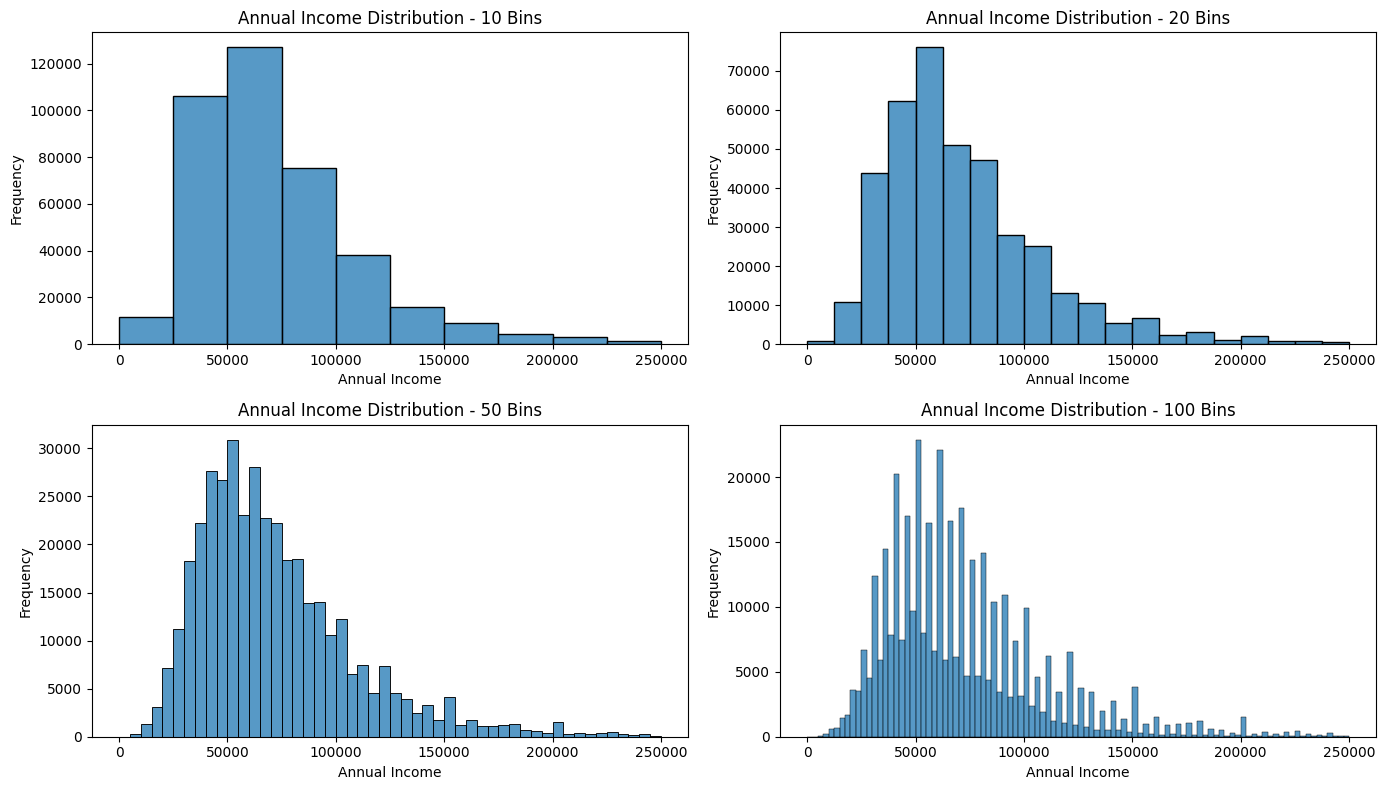

In [ ]:
bin_sizes = [10, 20, 50, 100]

plt.figure(figsize=(14, 8))
for i, bins in enumerate(bin_sizes, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df['annual_inc'], bins=bins, kde=False)
    plt.title(f'Annual Income Distribution - {bins} Bins')
    plt.xlabel('Annual Income')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:

income_bins = [0, 45000, 64000, 90000, 150000, float('inf')]
income_labels = ['Very Low Income', 'Low Income', 'Medium Income', 'High Income', 'Very High Income']

df['income_group'] = pd.cut(df['annual_inc'], bins=income_bins, labels=income_labels, right=True)

df['income_group'].value_counts()



mort_acc_means = df.groupby('income_group')['mort_acc'].mean()

for group in ['Very Low Income', 'Low Income', 'Medium Income', 'High Income', 'Very High Income']:
    df.loc[(df['income_group'] == group) & (df['mort_acc'].isna()), 'mort_acc'] = mort_acc_means[group]

print("Remaining nulls in mort_acc:", df['mort_acc'].isna().sum())



Remaining nulls in mort_acc: 0


In [ ]:
df.drop('emp_title', axis=1, inplace=True)

In [ ]:
print(f"Duplicate records: {df.duplicated().sum()}")

Duplicate records: 0


**Observations**:


1.   We remove those records which have annual_inc above the 99th %ile. After removing those records, we are left with 3.91 lakhs datapoints which is not much different from the original dataset size of 3.96 lakhs.   
2.   Columns emp_title, emp_length and mort_acc have high number of records with NULL values. Considering a threashold of 5% (of the total number of records in the dataset), emp_title and mort_acc columns need to be treated before further processing.
3.   Since emp_title is not a numerical column and since it will not signigicantly affect the loan_status, we can drop the column altogehter. Since mort_acc will have significant effect on the loan_status, we impute the missing values with the average mort_acc value based on the annual_inc slab. The reason why we choose annual_inc column is because out of all the available columns, this column will affect the loan_status more as people with higher incomes can have more mortgages. Also open_acc and total_acc cannot be used here since they represent credit lines and not the number of mortgages.
4.   We take the annual_inc column and bucket them into 5 different income slabs called 'income_group' and take the average of mort_acc for each of the income groups to fill the empty records.
5.   We now check for any duplicates in the data and find 0 duplicates.


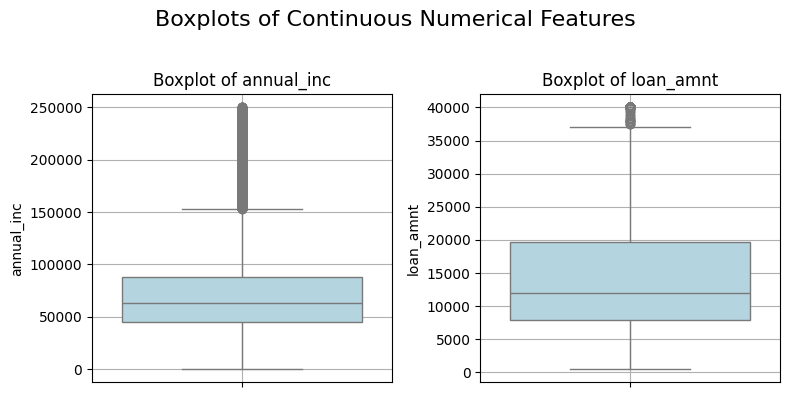

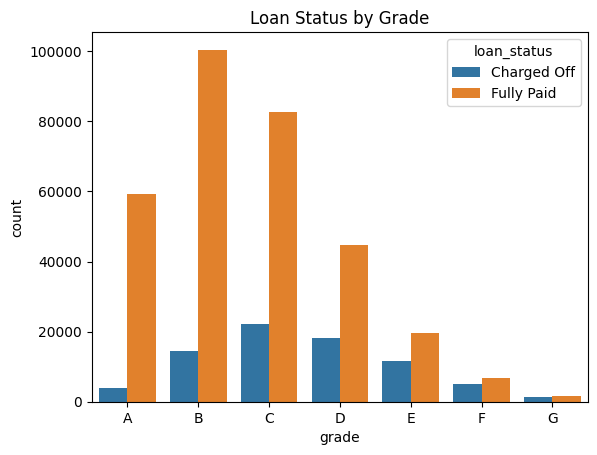

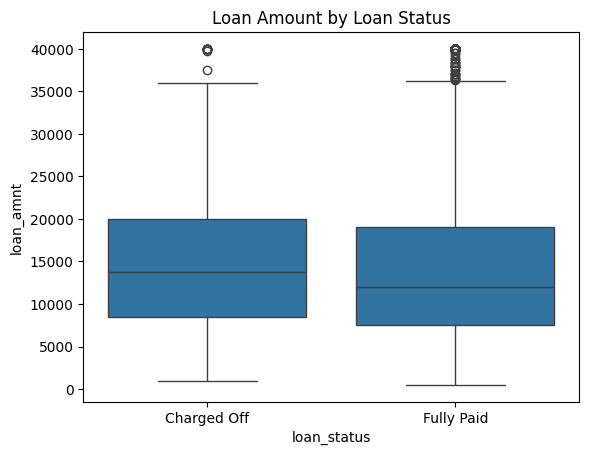

In [ ]:

# Univariate: Numeric distribution
numerical_cols = ['annual_inc', 'loan_amnt']

plt.figure(figsize=(8, 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)

plt.suptitle("Boxplots of Continuous Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# Bivariate - Grade vs Loan Status
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title("Loan Status by Grade")
plt.show()

# Boxplot: loan_amnt vs loan_status
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Loan Amount by Loan Status")
plt.show()




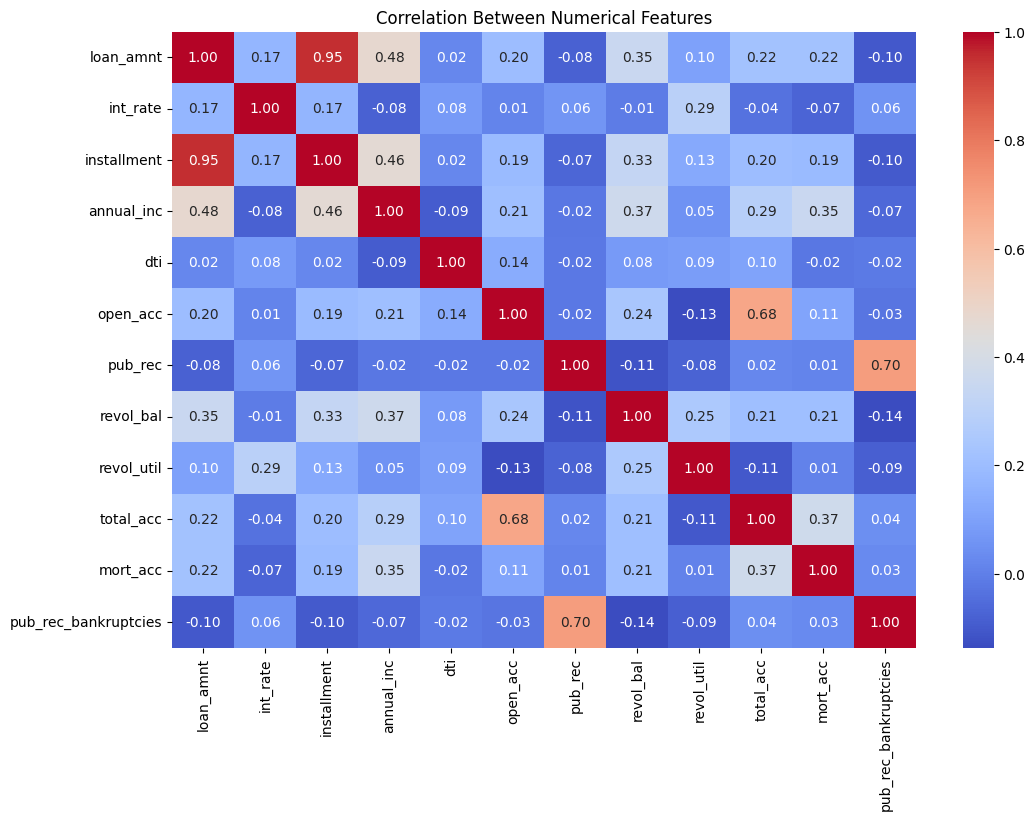

In [ ]:
# Correlation Heatmap

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Numerical Features")
plt.show()

**Observations**:

**Univariate analysis**:
1.   The median annual_inc appears to be somewhere around 60000 INR and the distribution is more likely to be right skewed implying few applicants reporting very high income
2.   The loan amount seems to be in a range of INR 5000 to INR 20000 and the variance appears to be shorter than compared to annual_inc

**Bivariate analysis:**
3.   Loans in A,B,C grades appear to have been mostly paid off whereas those in E,F,G seem to have significant write offs
4.   loan_amount appears to have similar distribution for both charged_off and fully_paid cases
5.   Except loan_amnt and installment, no other pair of columns seem to be correlated as the correlation values are very low. Since installment itself is derived from loan_amount, they have a higher correlation (0.95). We can remove the installment column to avoid multi collinearity since installment can always be derived from loan_amnt, interest rate and duration

In [ ]:
# Feature engineering and data preparation for modelling

df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

for col in ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']:
    df[col + '_flag'] = df[col].apply(lambda x: 1 if x > 1 else 0)


if df['term'].dtype != 'int64':
    df['term'] = df['term'].astype(str).str.strip().str.replace(' months', '').astype(int)

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,income_group,pub_rec_flag,mort_acc_flag,pub_rec_bankruptcies_flag
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",High Income,0,0,0
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Medium Income,0,1,0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Very Low Income,0,0,0
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Low Income,0,0,0
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Low Income,0,0,0


**Observations:**
1.  We create a new binary column loan_status with values as 0 and 1 since we need to perform a binary classification. We assign 'fully_paid' to 1 and 'charged_off' to 0.
2.  We create new flag variables for pub_rec, mort_acc and pub_rec_bankruptcies to check if any applicant has these flags set (value > 1) or not. This is because having multiple public records or mortgages or bankruptcies could be riskier and hence we need to have a separate column to identify them
3.  We convert the 'term' column to a numerical datatype by removing the word 'months' and converting it to an integer data type.


In [ ]:
# Model building
X = df.drop(['loan_status', 'issue_d', 'title', 'earliest_cr_line', 'address'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Filling missing values in revol_util and pub_rec_bankruptcies
X_train['revol_util'].fillna(X_train['revol_util'].mean(), inplace=True)
X_test['revol_util'].fillna(X_test['revol_util'].mean(), inplace=True)
X_train['pub_rec_bankruptcies'].fillna(X_train['pub_rec_bankruptcies'].mean(), inplace=True)
X_test['pub_rec_bankruptcies'].fillna(X_test['pub_rec_bankruptcies'].mean(), inplace=True)


categorical_cols = X_train.select_dtypes(include='category').columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.06      0.12     15311
           1       0.81      0.99      0.89     63080

    accuracy                           0.81     78391
   macro avg       0.68      0.53      0.50     78391
weighted avg       0.76      0.81      0.74     78391

[[  989 14322]
 [  813 62267]]


**Observations:**


1.   We drop columns like title, address etc. which do not influence the loan status
2.   The dependent variable loan_status is converted from string to a binary variable
3.   We use StandardScaler and perform one-hot encoding of the categorical variables
4.   We split the data into 80:20 for training/testing, train the model and measure its performance using confusion_matrix
5.   For 'Fully paid' loans (ie. output 1 predicted by our model), the precision is high implying that the model is mostly able to identify people who can fully pay their loans.
6.   For 'defaulted' loans (ie. output 0 generated by our model), the recall value is very low implying that the model is not able to identify the defaulters.
7.   Extending loans to the applicants based on the model's prediction will lead to high NPA due to high recall for defauled loans

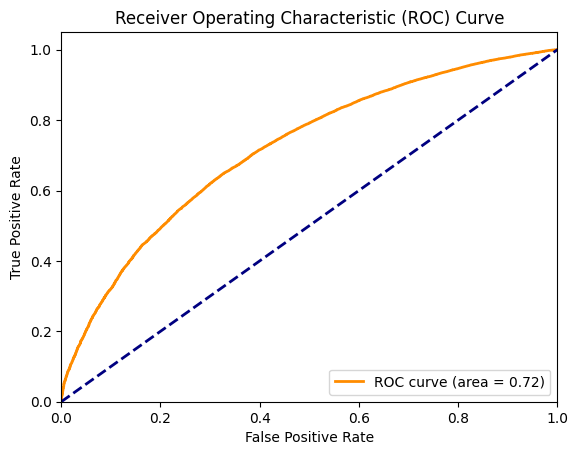

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Observations:

1.   The area under ROC curve is 0.72 whereas anythinh >0.8 could have been considered a good model
2.   For lower FPR, the TPR is also lower implying scope for further improvement in the model performance

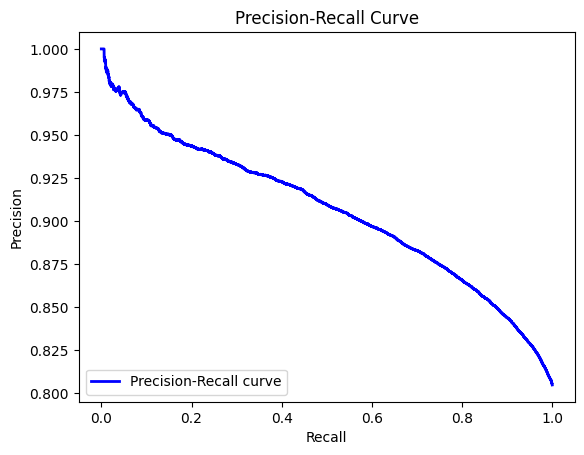

In [ ]:
# Precision Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score:",precision_score(y_test, y_pred))
print("Recall score:",recall_score(y_test, y_pred))


Precision score: 0.8130018671088538
Recall score: 0.9871116043119847


In [ ]:
print("\n\n\n")
# Answers to the questionnaire


# What percentage of customers have fully paid their loan amount?
# Convert 'loan_status' to numerical type before summing
fully_paid_percentage = (df['loan_status'].astype(int).sum() / len(df)) * 100
print(f"Percentage of customers who have fully paid their loan amount: {fully_paid_percentage:.2f}%")

# Comment about the correlation between loan amount and installment features
correlation = df['loan_amnt'].corr(df['installment'])
print(f"\nThe correlation between loan amount and installment is: {correlation:.2f}")

# The majority of the people have home ownership as ______________?
majority_home_ownership = df['home_ownership'].mode()[0]
print(f"\nThe majority of people have home ownership as: {majority_home_ownership}")

# People with grades ‘A’ are more likely to fully pay their loan amount (True of False)?
print("\nBased on the bivariate analysis plot 'Loan Status by Grade', people with grades 'A' are more likely to fully pay their loan amount: True")

# Based on the observation "Extending loans to the applicants based on the model's prediction will lead to high NPA due to high recall for defauled loans", the provided analysis implies the concern is the model's inability to identify defaulters. This aligns with the Recall of the 'Charged Off' class (0).
print("\nFrom a bank's perspective, the primary focus should be on **Recall** (specifically, maximizing recall for the 'Charged Off' class, or equivalently, focusing on minimizing False Negatives where the negative class is 'Charged Off'). The current model has very low recall for the 'Charged Off' class, meaning it misses most defaulters.")

# How does the gap in Precision and recall affect the bank?
print("\nHow the gap in Precision and Recall affects the bank:")
print("- A high gap between Precision and Recall (specifically, low Recall for the 'Charged Off' class and high Precision for the 'Fully Paid' class, as seen in the report) means the model is good at identifying customers who will likely pay (high precision for 'Fully Paid'), but it is very poor at identifying customers who will default (low recall for 'Charged Off').")
print("- For the bank, this means they will approve loans for many defaulters that the model failed to identify, leading to significant financial losses due to Non-Performing Assets (NPAs).")
print("- While the model is efficient in approving loans for truly creditworthy individuals, its inability to flag risky applicants is a major drawback for risk management.")

# Which were the features that heavily alter the outcome?
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

print("\nFeatures that heavily alter the outcome")
print(sorted_coefficients.head(10)) # Print top 10 features

# Will the results be affected by geographical location (yes or no)
print("\nWill the results be affected by geographical location: No, since geographical location does not influence a bank's decision to lend a loan.")







Percentage of customers who have fully paid their loan amount: 80.33%

The correlation between loan amount and installment is: 0.95

The majority of people have home ownership as: MORTGAGE

Based on the bivariate analysis plot 'Loan Status by Grade', people with grades 'A' are more likely to fully pay their loan amount: True

From a bank's perspective, the primary focus should be on **Recall** (specifically, maximizing recall for the 'Charged Off' class, or equivalently, focusing on minimizing False Negatives where the negative class is 'Charged Off'). The current model has very low recall for the 'Charged Off' class, meaning it misses most defaulters.

How the gap in Precision and Recall affects the bank:
- A high gap between Precision and Recall (specifically, low Recall for the 'Charged Off' class and high Precision for the 'Fully Paid' class, as seen in the report) means the model is good at identifying customers who will likely pay (high precision for 'Fully Paid'), but it is 

**Insights and Recommendations:**


1.   The current Logistic Regression model is effective at identifying applicants who are likely to fully pay their loans (high precision for the 'Fully Paid' class).
2.   However, the model is poor at identifying potential defaulters (very low recall for the 'Charged Off' class). This is a significant risk which can lead to NPA.
3.   The model's AUC of 0.72 is moderate, indicating scope for improvement.
4.   Using this model as is would lead to a high rate of approving loans for individuals who will ultimately default, resulting in substantial Non-Performing Assets (NPAs) for the bank.
5.   The current model needs significant improvement in its ability to predict defaulters. We can consider undersampling to address the class imbalance in the model's prediction.
6.   Since the current model is not reliable for identifying defaulters, LoanTap should implement stricter manual review processes or additional rule-based filters, especially for applicants identified as higher risk by the model.
